# Indicator Notebook

In [ ]:
import sys
from pathlib import Path

# Trouve le dossier racine du projet (celui qui contient 'src')
project_root = Path().resolve().parents[0]  # si ton notebook est dans 'notebook/'
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

In [4]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from bike import indicators as ind
from bike import utils as ut

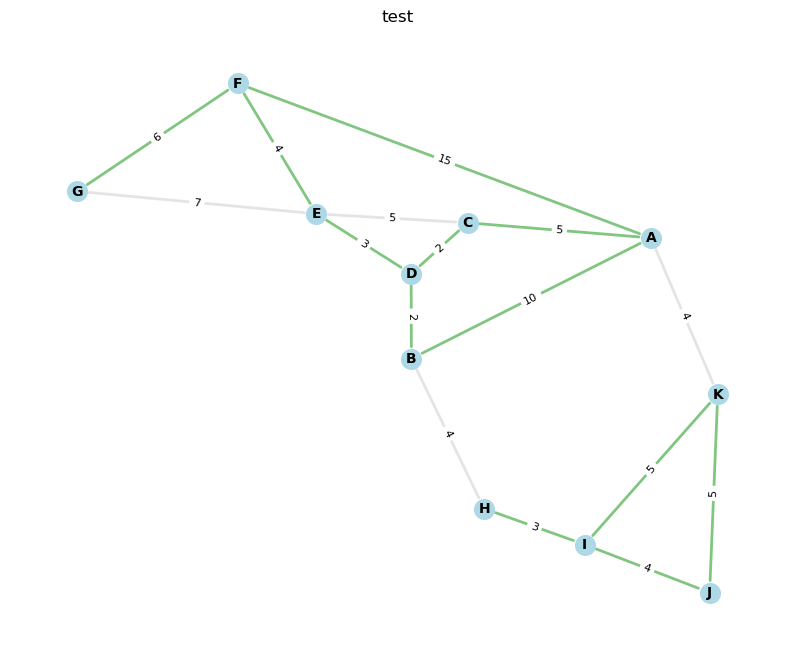

In [7]:
ut.draw_graph(ut.city_graph_generator(100, 1), "test")

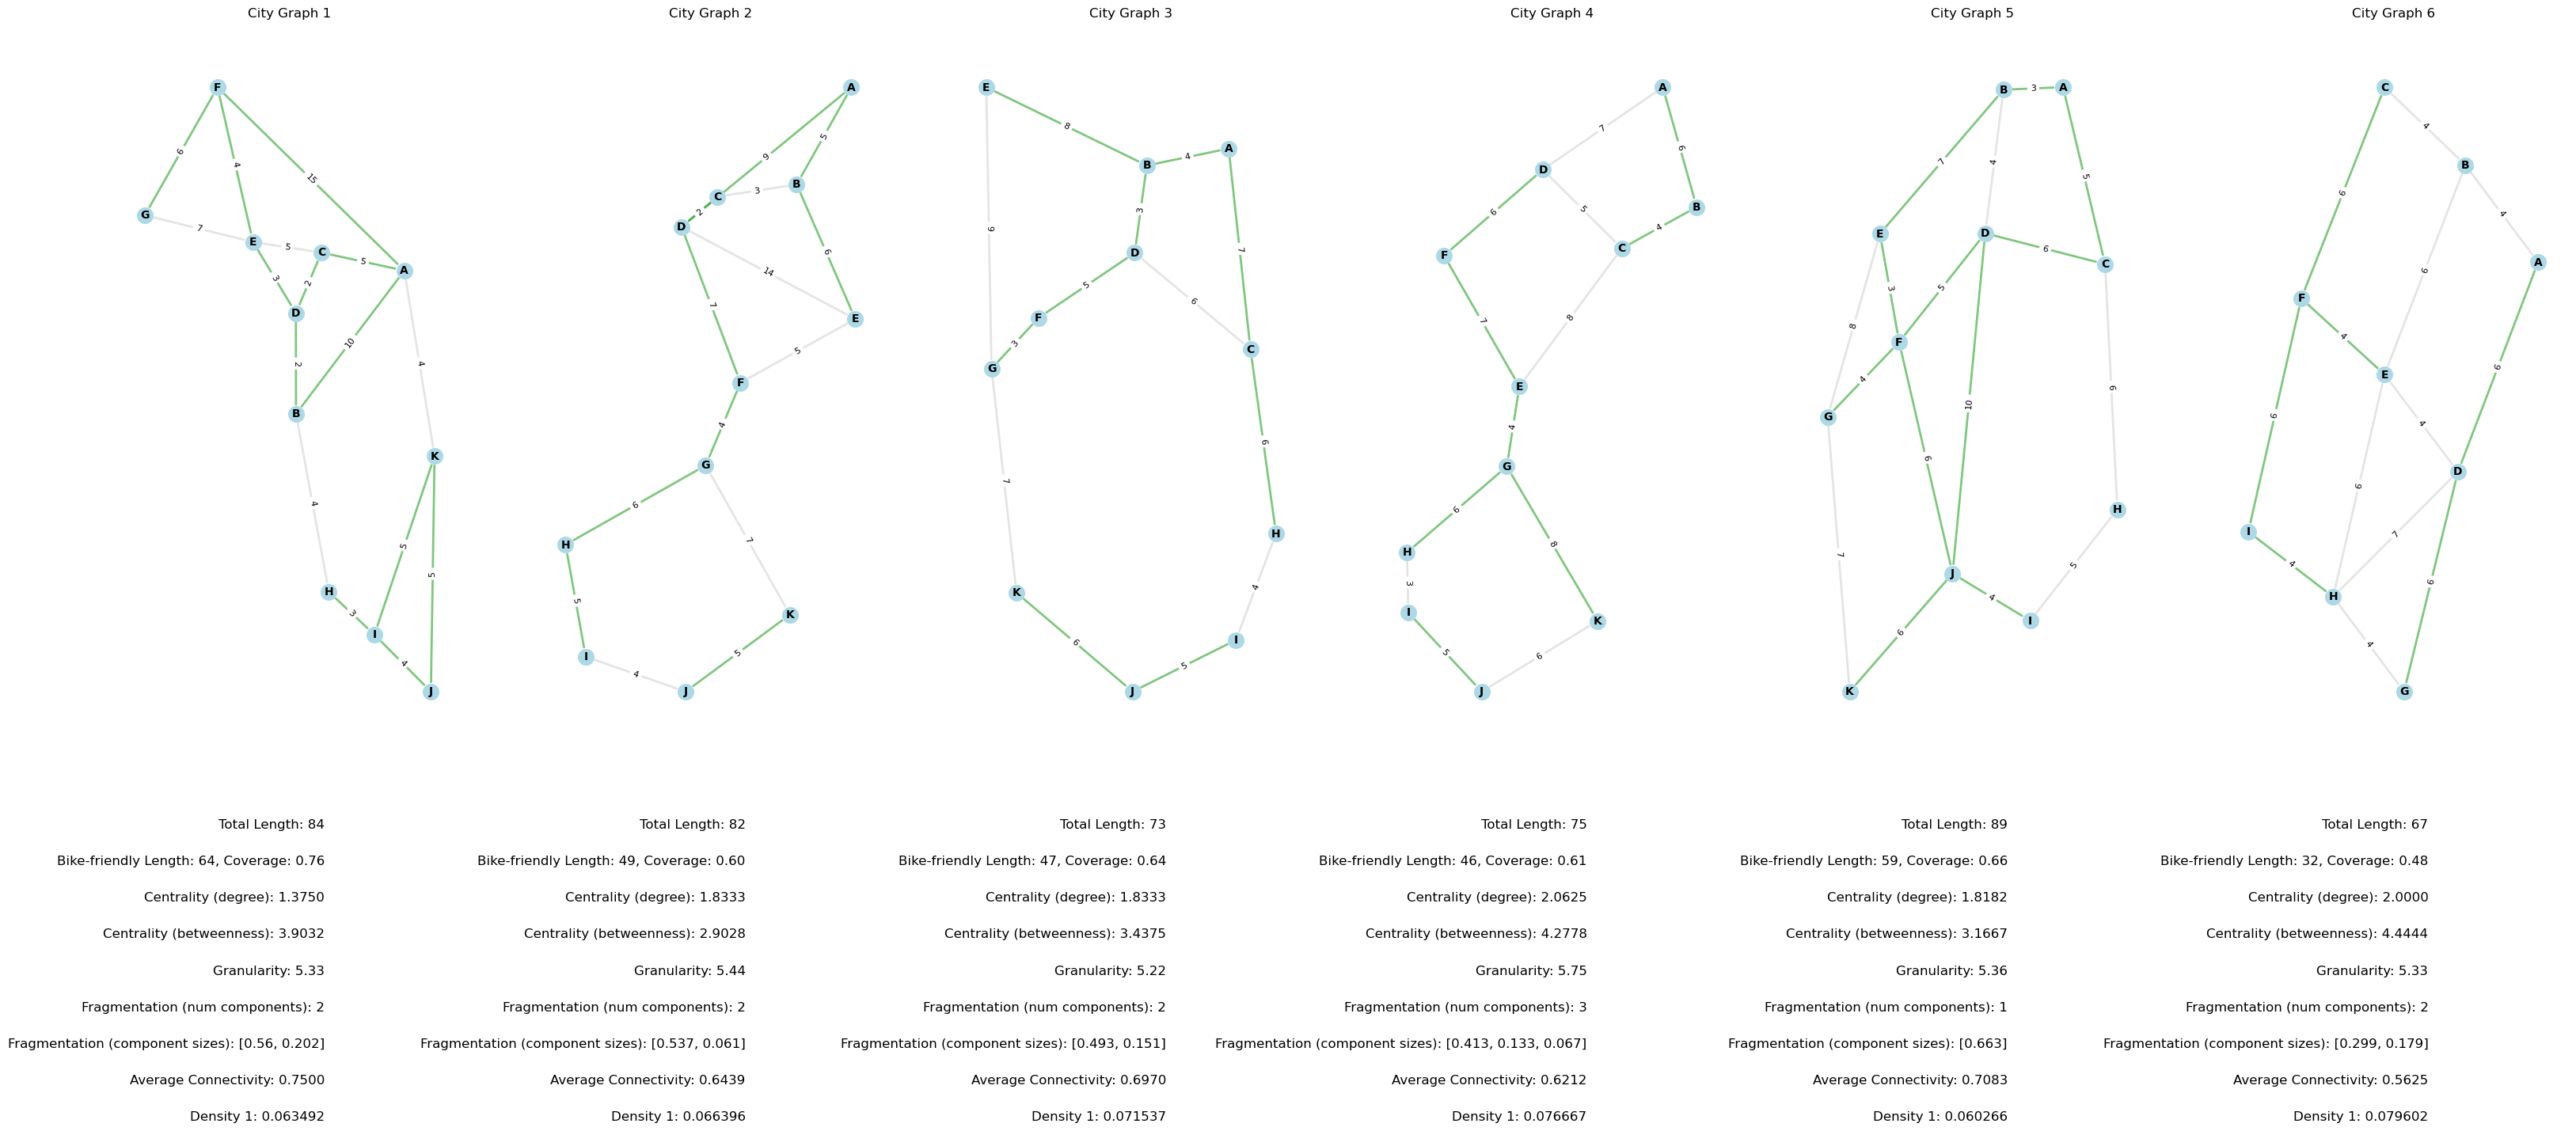

In [9]:
fig, ax = plt.subplots(1, 6, figsize=(40, 12))
for i in range(1,7):
    G = ut.city_graph_generator(10, i)
    ut.draw_graph(G, f"City Graph {i}", ax=ax[i-1])
    ax[i-1].text(0.6, -0.1, f"Total Length: {ind.network_size(G)}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.15, f"Bike-friendly Length: {ind.network_size(ind.extract_bike_friendly_subgraph(G))}, Coverage: {ind.network_coverage(G):.2f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.2, f"Centrality (degree): {ind.network_centrality_degree(G):.4f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.25, f"Centrality (betweenness): {ind.network_centrality_betweeness(G):.4f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.30, f"Granularity: {ind.network_granularity(G, bikes_only=True):.2f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.35, f"Fragmentation (num components): {ind.network_fragmentation_num(G)}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.40, f"Fragmentation (component sizes): {ind.network_fragmentation_sizes(G)}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.45, f"Average Connectivity: {ind.network_connectivity(G):.4f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.50, f"Density 1: {ind.network_density_1(G):.6f}", size=12, ha="right", transform=ax[i-1].transAxes)

In [10]:
graph_belleville_velo = ut.import_osm_graph("Belleville en Beaujolais, France", network_type='all')

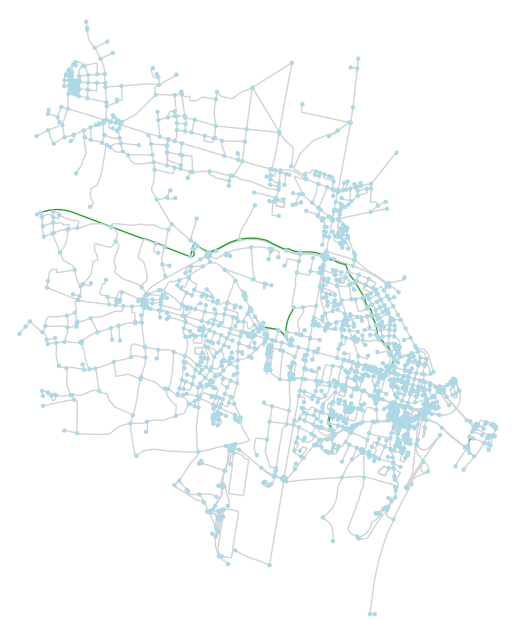

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

In [11]:
color_map = {True: "tab:green", False: "lightgray"}
edge_colors = [color_map.get(data['bikes'], "lightgray") for u, v, data in graph_belleville_velo.edges(data=True)]
ox.plot_graph(graph_belleville_velo, node_size=10, node_color="lightblue", edge_color=edge_colors, figsize=(10, 8), bgcolor="#ffffff")

In [12]:
print(ind.compute_all_indicators(graph_belleville_velo))

{'Size': 220393.64309322296, 'Granularity': 79.4211326462067, 'Coverage': 0.03090553095987735, 'Degree Centrality': 1.5725806451612903, 'Betweenness Centrality': 3.677007299270073, 'Number of Components': 6, 'Component Sizes': [0.024, 0.002, 0.002, 0.001, 0.001, 0.001], 'Connectivity': 0.5625641025641025, 'Density 1': 0.0004984763058044733}
